In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import seaborn as sns
import sys
%matplotlib inline
plt.rcParams['figure.figsize'] = (6,6) # set default size of plots
from sklearn.datasets import make_moons, make_blobs, make_biclusters
from scipy.stats import gaussian_kde

In [2]:
mkern = np.load('./moons_kernel.npy')

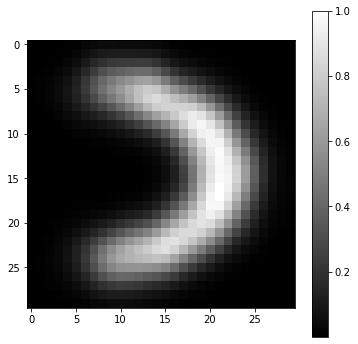

In [3]:
plt.imshow(mkern, cmap='gray')
plt.colorbar()

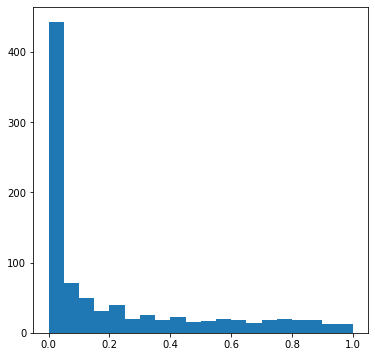

In [23]:
plt.hist(mkern.ravel(), bins=20);

In [4]:
width = 30

In [10]:
image = np.load('./image_256x256.npy')
image = image/3

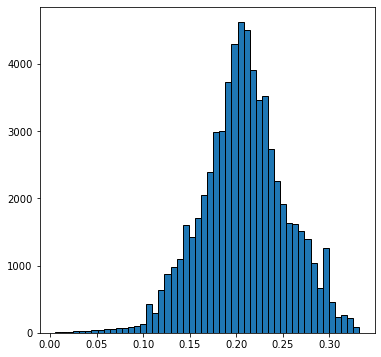

In [11]:
plt.hist(image.ravel(), bins=50, edgecolor='black');

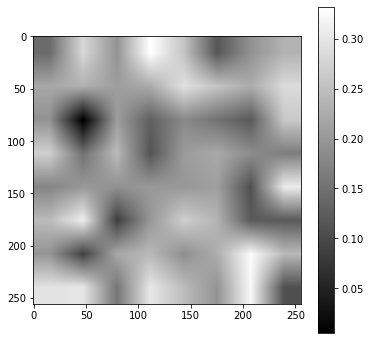

In [12]:
plt.imshow(image, cmap='gray')
plt.colorbar()

In [19]:
image.shape

(256, 256)

In [20]:
256-30+1

227

In [13]:
for i in range(5):
    i,j = np.random.randint(0, 256-width), np.random.randint(0, 256-width)
    image[i:i+width, j:j+width] = image[i:i+width, j:j+width] + mkern

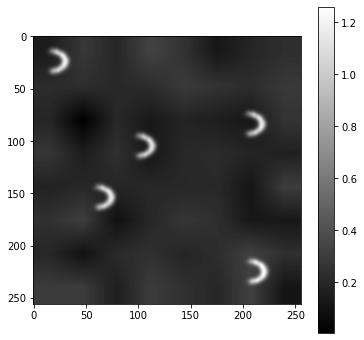

In [14]:
plt.imshow(image, cmap='gray')
plt.colorbar()

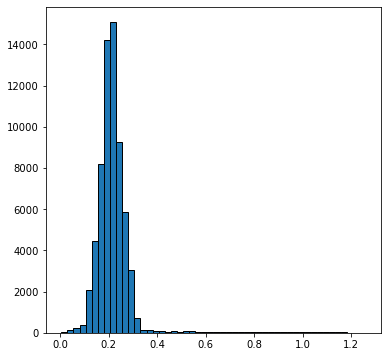

In [15]:
plt.hist(image.ravel(), bins=50, edgecolor='black');

## Свёрточная операция

In [16]:
def conv2d(input_image, kernel):
    im_h, im_w = input_image.shape
    k_h, k_w = kernel.shape
    
    result = np.zeros((im_h-k_h+1, im_w-k_w+1))
    for i in range(im_h-k_h+1):
        for j in range(im_w-k_w+1):
            result[i,j] = (input_image[i:i+k_h, j:j+k_w]*kernel).sum()
            
    return result

In [17]:
img_conv = conv2d(image, mkern-mkern.mean())

In [18]:
img_conv.shape

(227, 227)

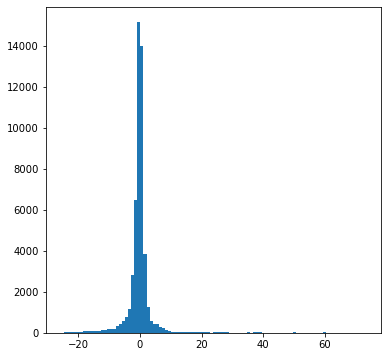

In [21]:
plt.hist(img_conv.ravel(), bins=100);

In [24]:
img_conv = (img_conv-img_conv.min())/(img_conv.max()-img_conv.min())

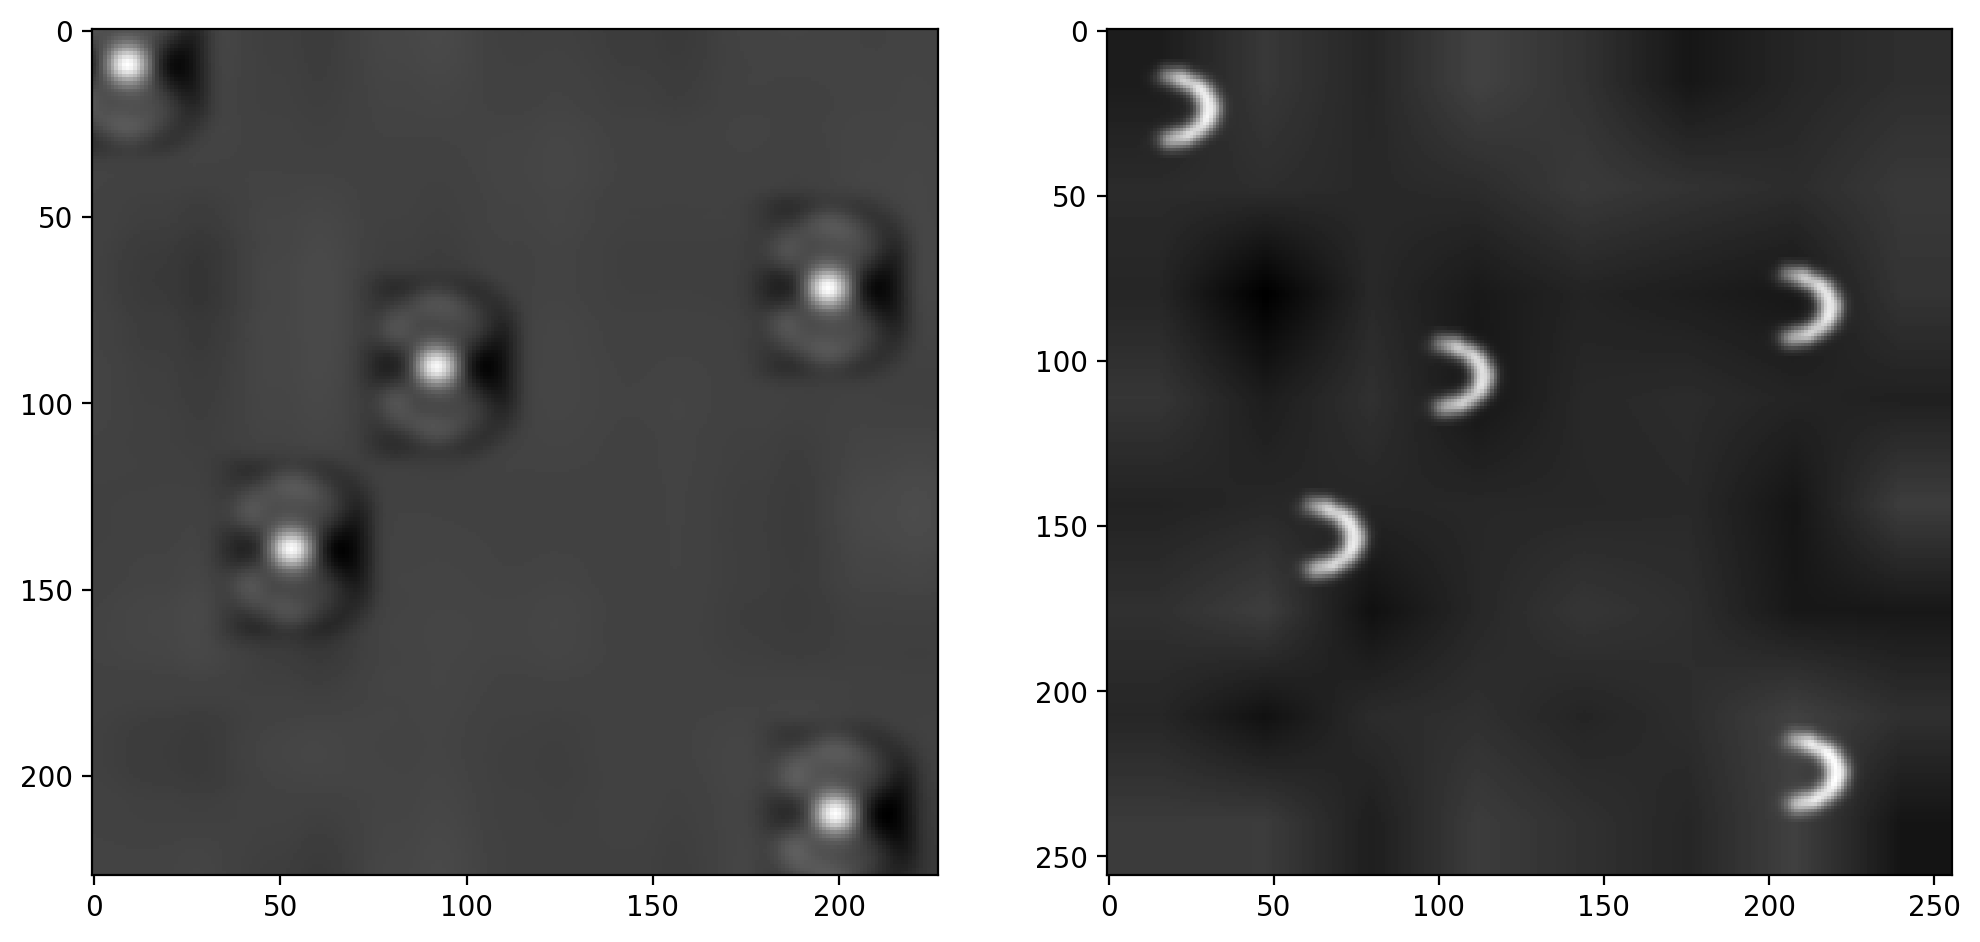

In [25]:
f = plt.figure(figsize=(12,6), dpi=200)
p = plt.subplot(1,2,1)
plt.imshow(img_conv, vmin=0, vmax=1, cmap='gray')
# plt.colorbar()

p = plt.subplot(1,2,2)
plt.imshow(image, cmap='gray')

In [26]:
mkern_inv = 1-mkern

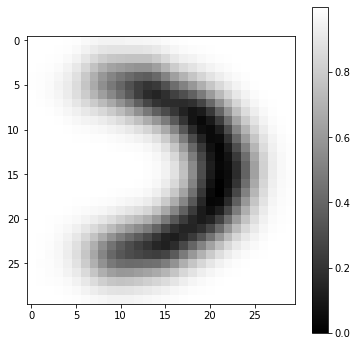

In [27]:
plt.imshow(mkern_inv, cmap='gray')
plt.colorbar()

In [28]:
img_conv = conv2d(image, mkern_inv-mkern_inv.mean())

In [29]:
img_conv = (img_conv-img_conv.min())/(img_conv.max()-img_conv.min())

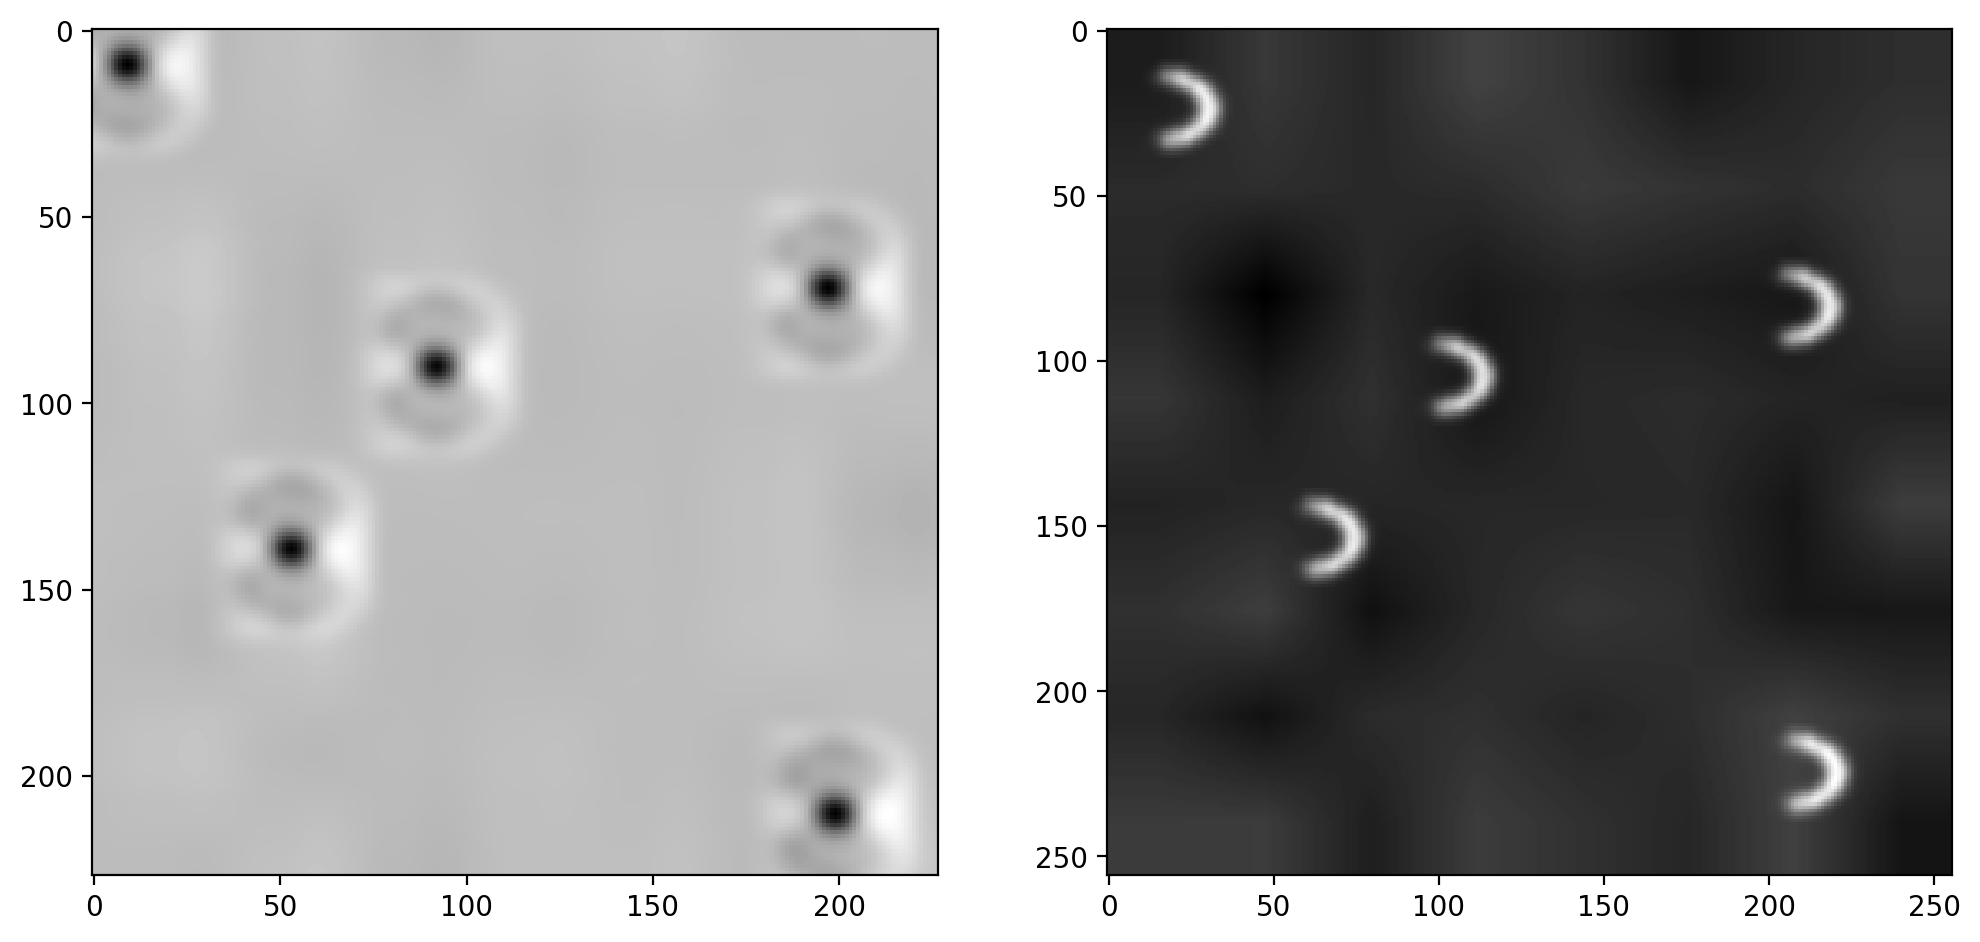

In [30]:
f = plt.figure(figsize=(12,6), dpi=200)
p = plt.subplot(1,2,1)
plt.imshow(img_conv, vmin=0, vmax=1, cmap='gray')
# plt.colorbar()

p = plt.subplot(1,2,2)
plt.imshow(image, cmap='gray')

In [39]:
width = 5

In [40]:
grad_kern = np.arange(0,width,1)[np.newaxis, :]
grad_kern = np.tile(grad_kern, (width, 1))

In [41]:
grad_kern = (grad_kern-grad_kern.min())/(grad_kern.max()-grad_kern.min())

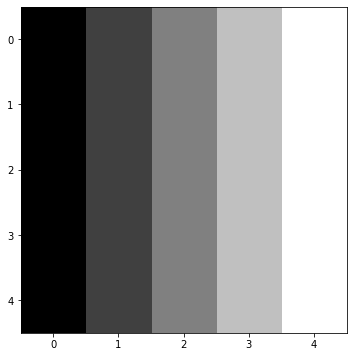

In [42]:
plt.imshow(grad_kern, cmap='gray');

In [43]:
img_conv_grad = conv2d(image, grad_kern)

In [44]:
img_conv_grad.shape

(252, 252)

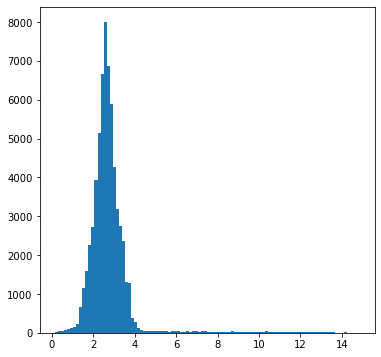

In [45]:
plt.hist(img_conv_grad.ravel(), bins=100);

In [46]:
img_conv2 = (img_conv_grad-img_conv_grad.min())/(img_conv_grad.max()-img_conv_grad.min())

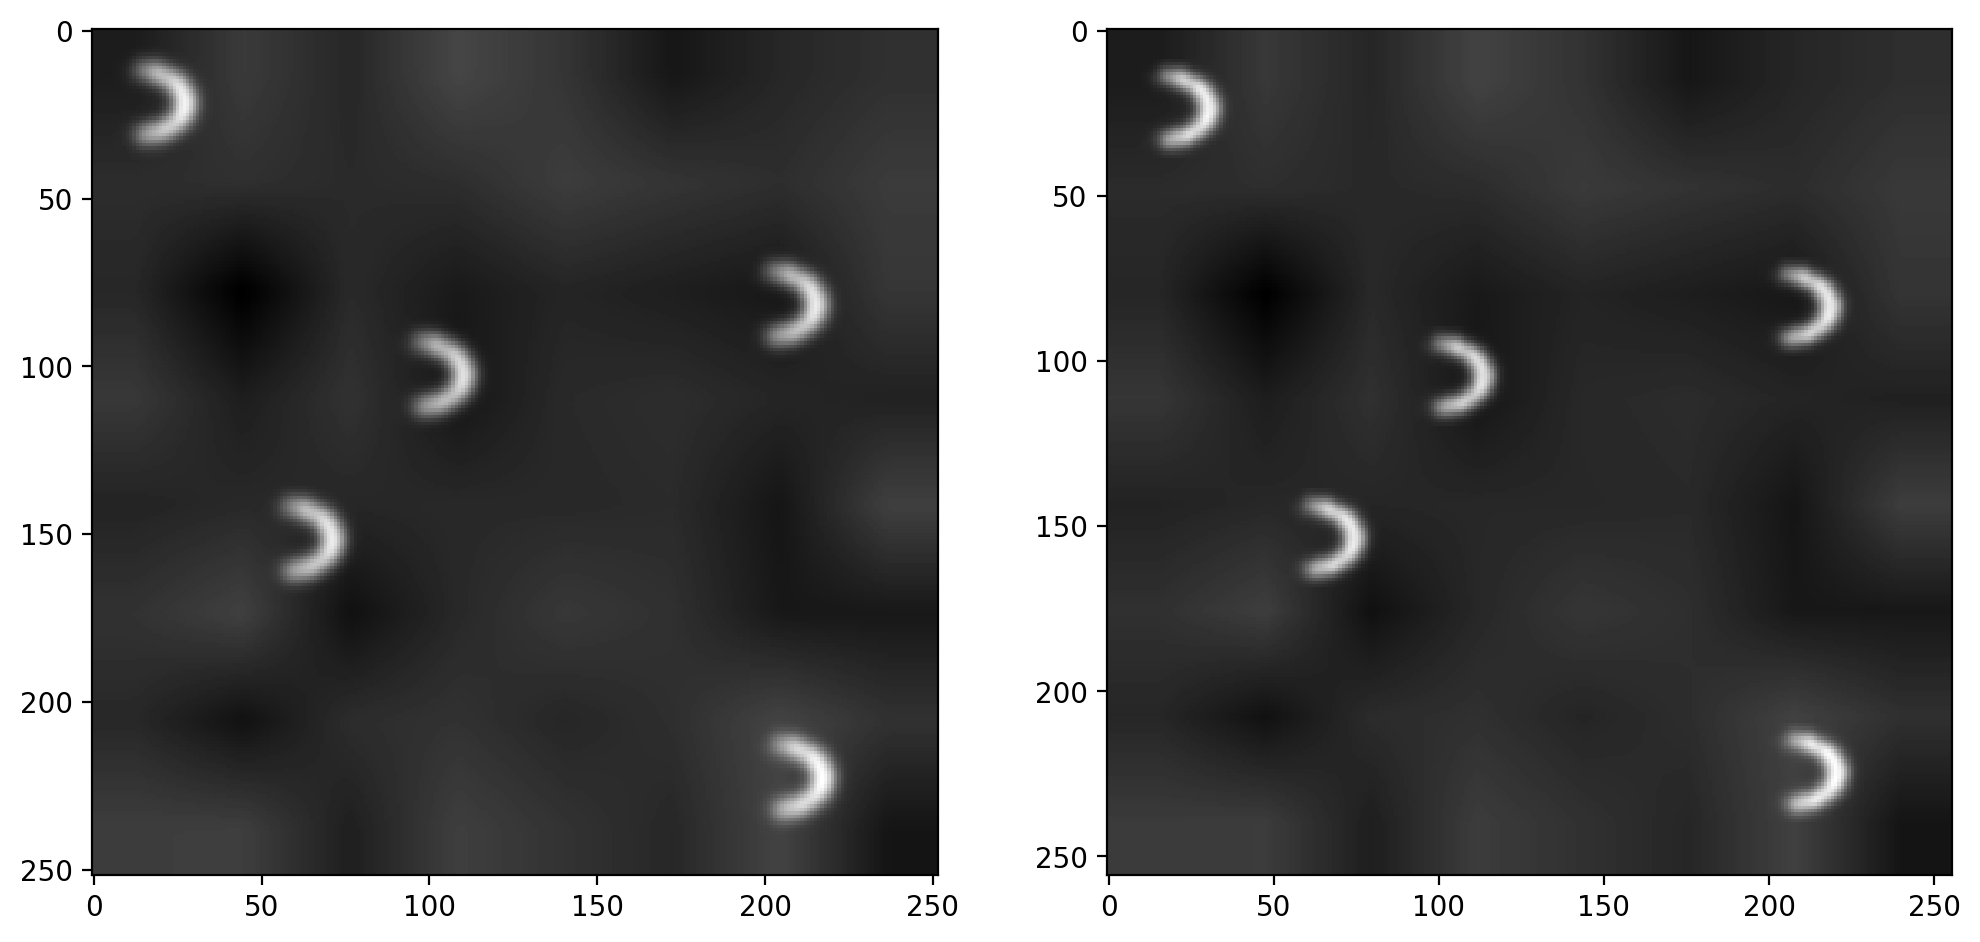

In [47]:
f = plt.figure(figsize=(12,6), dpi=200)
p = plt.subplot(1,2,1)
plt.imshow(img_conv2, vmin=0, vmax=1, cmap='gray')
# plt.colorbar()

p = plt.subplot(1,2,2)
plt.imshow(image, cmap='gray')

Ядро для выделения границ

In [48]:
edge_kernel = np.array([[1 , 1, 1],
                        [1 ,-8, 1],
                        [1,  1, 1]])

In [49]:
edge_image =  conv2d(image, edge_kernel)

In [50]:
edge_image = np.abs(edge_image)

In [51]:
edge_image.shape

(254, 254)

In [53]:
edge_image = (edge_image/edge_image.max())

In [54]:
edge_image.min(), edge_image.max()

(0.0, 1.0)

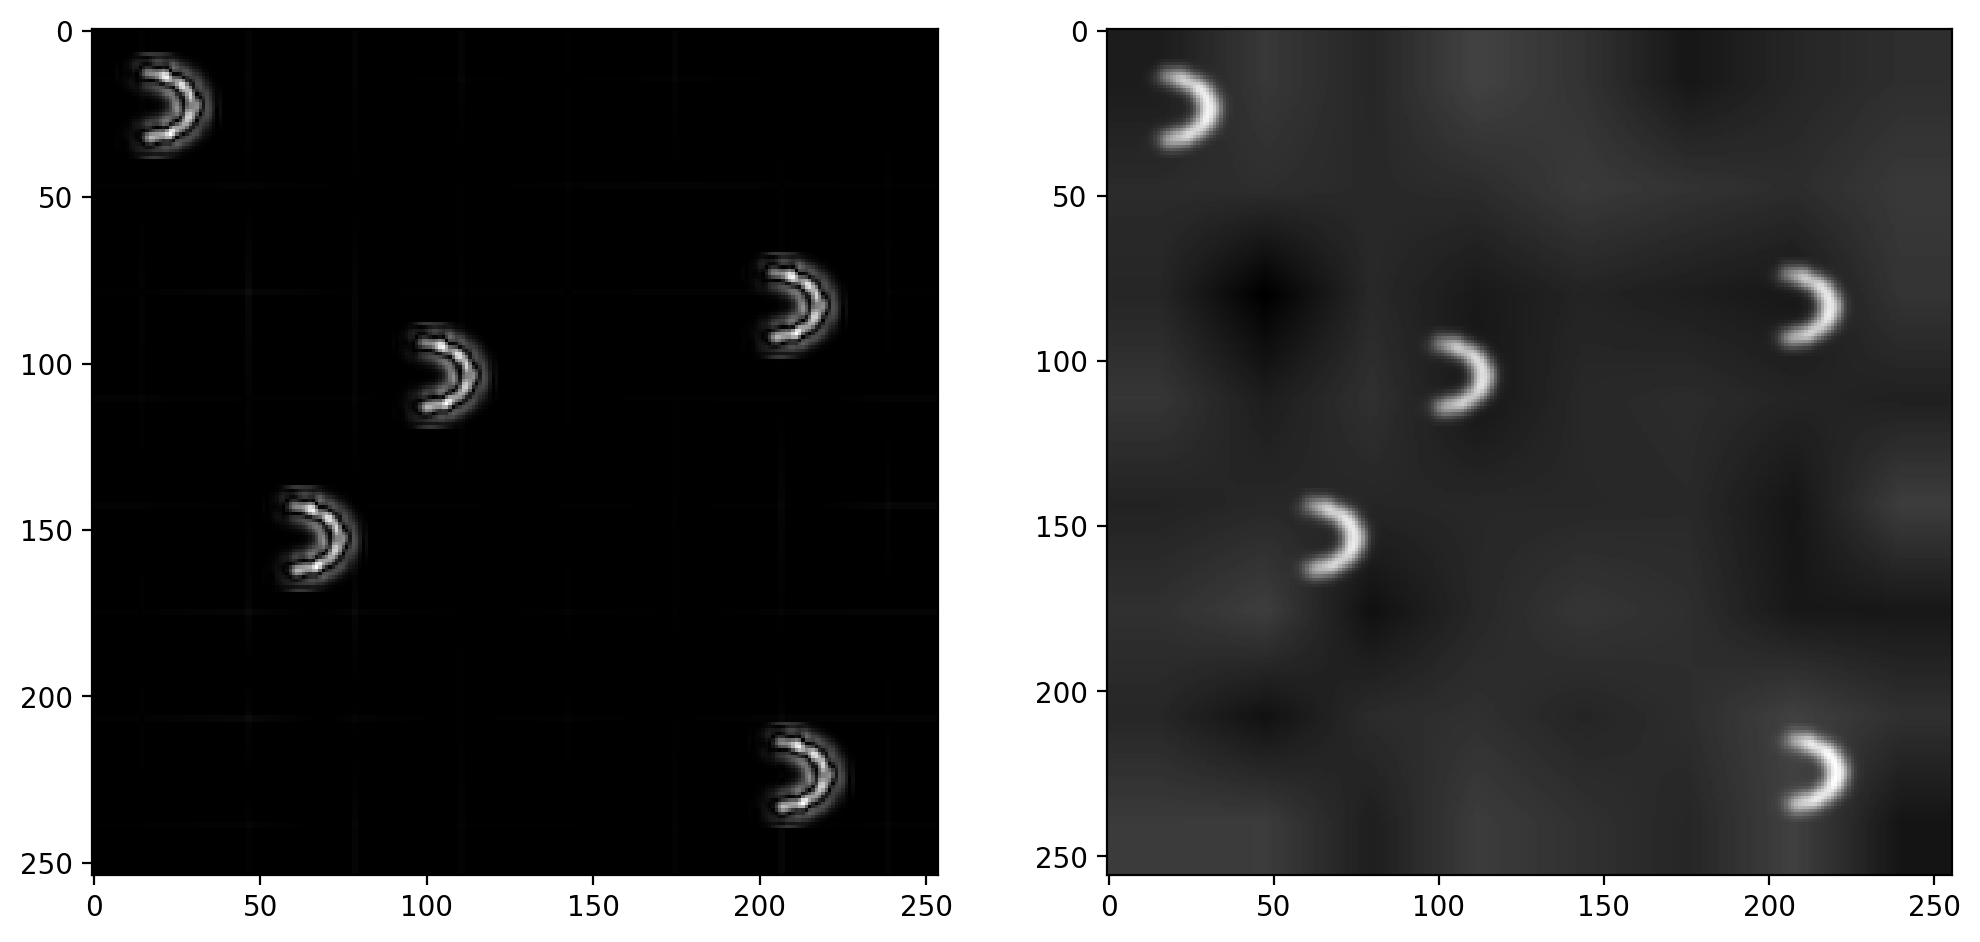

In [55]:
f = plt.figure(figsize=(12,6), dpi=200)
p = plt.subplot(1,2,1)
plt.imshow(edge_image, cmap='gray')
# plt.colorbar()

p = plt.subplot(1,2,2)
plt.imshow(image, cmap='gray')